In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
import os 
from datetime import datetime
%matplotlib inline

In [2]:
netflix = pd.read_csv("netflix_titles.csv")
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Вопросы:
1.  В какой год Нетфликс выпустил больше всего контента. 
2. Сколько времени в среднем занимает просмотр фильма? 
3. Чего больше сериaлов или фильмов?
4. В какой категории больше всего выбора?(Топ 50)
5. Какая страна больше всего производит контент на нетфликс? 
6. У какого режиссера больше всего фильмов? (топ 20)

# Ответы 
1. График №1. Больше всего Нетфликс выпустил контента в 2019 году. Мы видим постепенный рост кол-во фильмов и сериалов с начала 2000 годов и огромный скачок в 2015 и 2016 годах. Также стоит заметить что на их платформе есть также и не их оригинальные фильмы. Самый старый фильм был выпущен в 1925 году. Больше всего Нетфликс выпустил контента в 2018 году(более 1000), в 2019 чуть меньше и про 2020 год еще мало данных. 
2. График №2. В основном просмотр фильма на Нетфликс занимает от 85 до 115 минут. Также много фильмов и более 150 минут и менее 40 минут. Самый долгий фильм идет 310 минут и самый короткий менее 5 минут. 
3. Как видно на графике 3, фильмов больше чем сериалов на нетфликс. 68.4% и 31.6%
4. Самая крупная категория это Documentaries(299), потом идет Stand-Up Comedy(273) и Dramas, International Movies(248). Можно посмотреть на графике  №4
5. Графике №4. США больше всего производит контент для нетфлик(2032), на 2 месте Индия(777) и на 3 Великобритания(348). Стоит заметить что США и Великобритания совместно тоже входят в топ 15 по созданию фильмов и сериалов на Нетфликс. 
6. Графике №4. Больше всего фильмов у Raúl Campos, Jan Suter; Marcus Raboy и Jay Karas. 

In [3]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


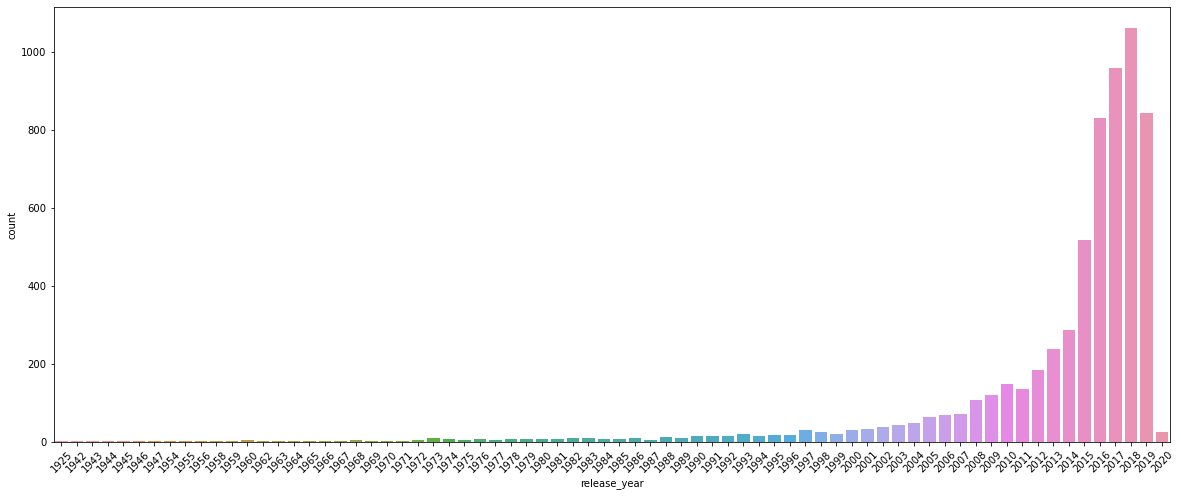

In [4]:
# График №1
plt.figure(figsize = (20,8));
sns.countplot(x = 'release_year' , data = netflix);
plt.xticks(rotation=45);

<ipython-input-38-f442676a77cc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie['duration'] = movie['duration'].str.strip('min').astype(int)


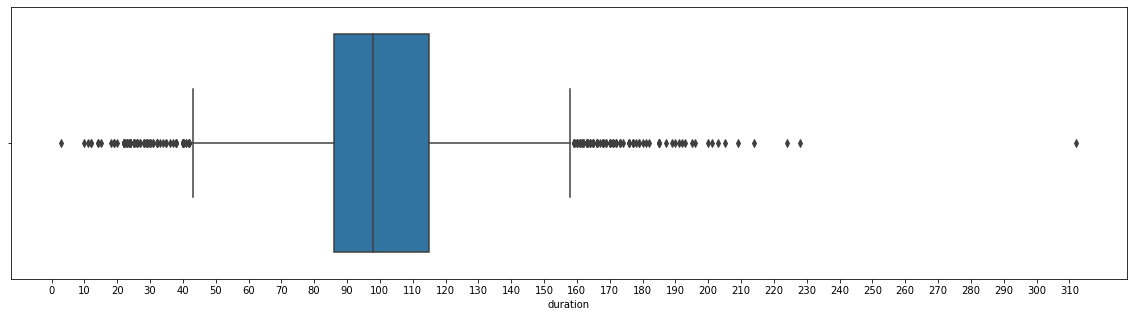

In [38]:
# График №2
movie = netflix[netflix['type'] =='Movie']
movie['duration'] = movie['duration'].str.strip('min').astype(int)
plt.figure(figsize = (20,5));
sns.boxplot(x = 'duration', orient = 'h', data = movie);
plt.xticks(np.arange(0,320,10));

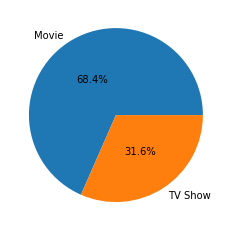

In [6]:
# График №3
count = netflix['type'].value_counts()
plt.pie(x = count, labels = count.index,autopct = lambda x: f'{x:.1f}%', pctdistance = 0.5 );

In [18]:
netflix['listed_in'].value_counts()

Documentaries                                            299
Stand-Up Comedy                                          273
Dramas, International Movies                             248
Dramas, Independent Movies, International Movies         186
Comedies, Dramas, International Movies                   174
                                                        ... 
Classic & Cult TV, TV Horror, TV Mysteries                 1
TV Action & Adventure, TV Horror, TV Sci-Fi & Fantasy      1
Sports Movies                                              1
Horror Movies, International Movies, Sci-Fi & Fantasy      1
Kids' TV, TV Dramas, Teen TV Shows                         1
Name: listed_in, Length: 461, dtype: int64

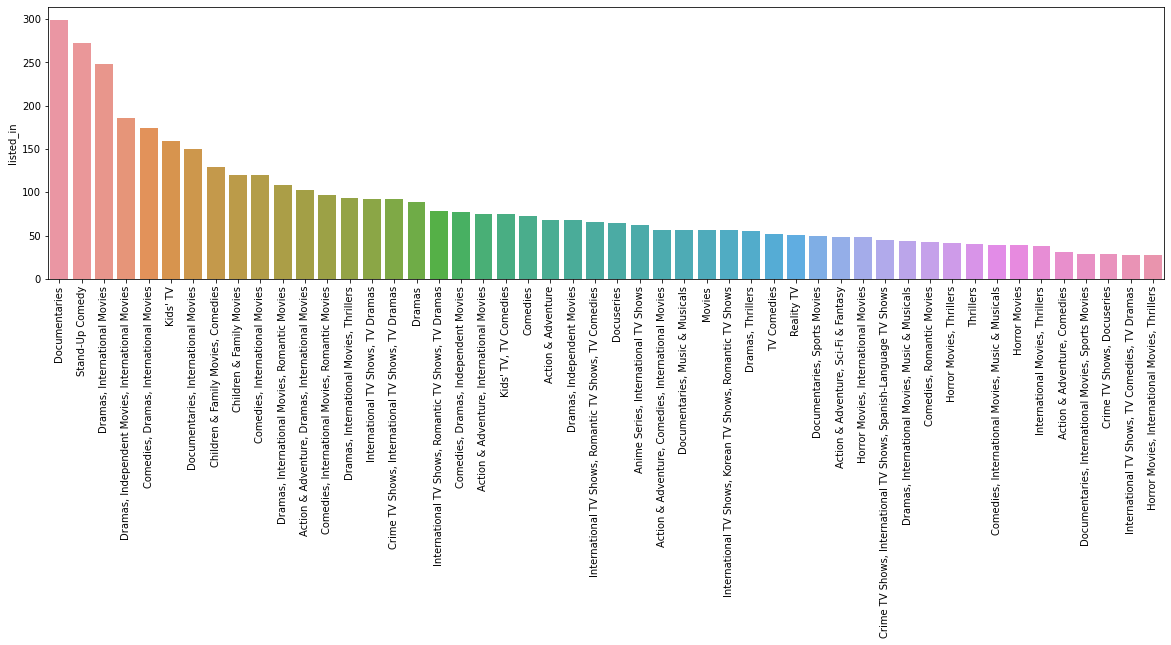

In [7]:
# График №4
count = netflix['listed_in'].value_counts().head(50)
plt.figure(figsize = (20,5))
sns.barplot(x = count.index, y = count );
plt.xticks(rotation = 90);

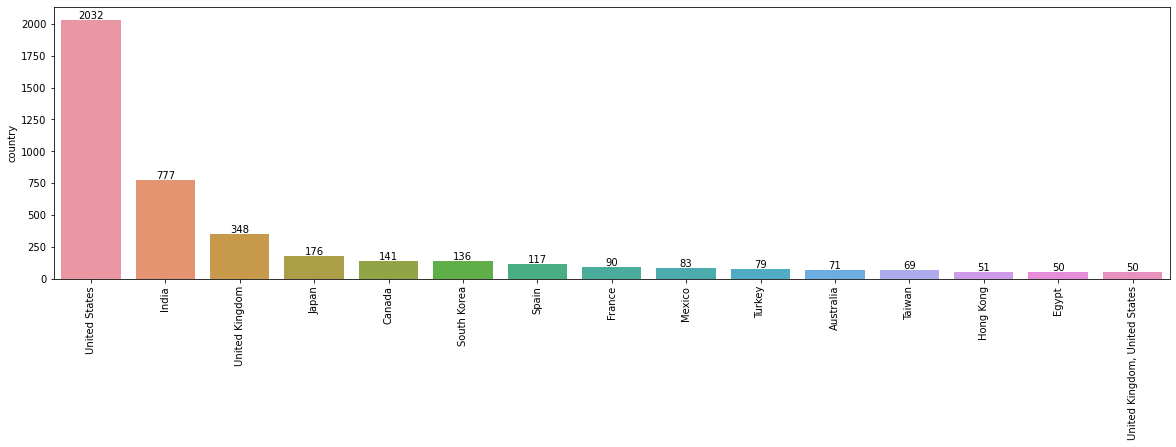

In [37]:
# График №5
count = netflix['country'].value_counts().head(15)
plt.figure(figsize = (20,5))
sns.barplot(x = count.index, y = count );
plt.xticks(rotation = 90);
for num, value in enumerate(count):
    plt.text(num, value+10, str(value), horizontalalignment = 'center')


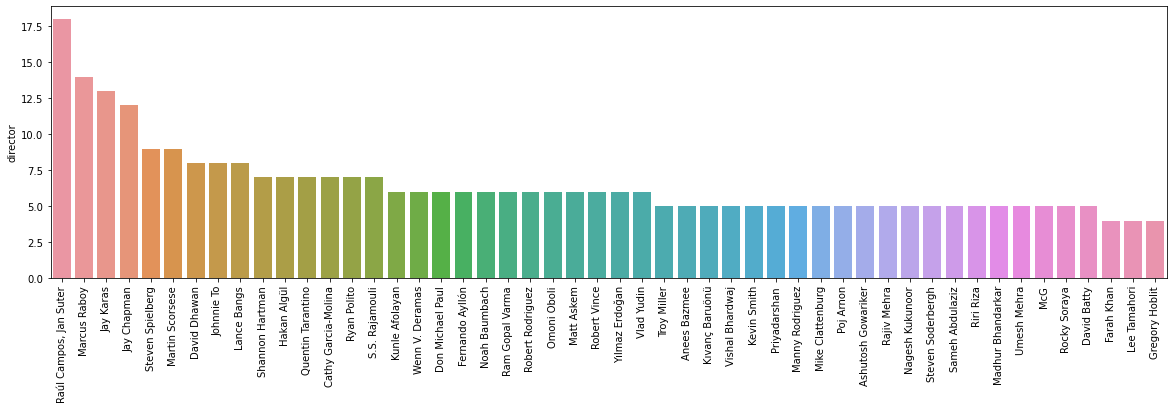

In [9]:
# График №6
count = netflix['director'].value_counts().head(50)
plt.figure(figsize = (20,5))
sns.barplot(x = count.index, y = count );
plt.xticks(rotation = 90);